# Vizualizacija voxela

Jednostavna skripta za vizualizaciju voxela pomocu matplotliba.
Nije idealna vizualizacija za naše potrebe (vidi "VizualizacijaVoxelaMayavi.ipynb"). <br>

Matplotlib 3D prikazuje voxele ukoliko su asocirani s nekom vrijednošću. Npr. ako smo na koordinatama (0, 0, 0) prediktali da je vjerojatnost pojave voxela na tom mjestu 1 (sigurna pojava) iscrtat će se voxel, što je u redu. Ukoliko smo na mjestu (1,0,0) prediktali da je vjerojatnost pojave voxela 0,01 matplotlib će ga također nacrtati, što nam ne odgovara. Želimo da veličina voxela odgovara njegovoj vjerojatnosti. Ovo nam omogućuje biblioteka mayavi.



In [1]:
import scipy.io as sio
import pickle

import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib widget

In [2]:
njnj = sio.loadmat("10.mat")

In [3]:
njnj

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Mar  3 12:30:39 2016',
 '__version__': '1.0',
 '__globals__': [],
 'grid': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0

In [4]:
njnj.keys()

dict_keys(['__header__', '__version__', '__globals__', 'grid'])

In [5]:
nj = njnj["grid"]

In [6]:
nj

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
nj.shape

(20, 20, 20)

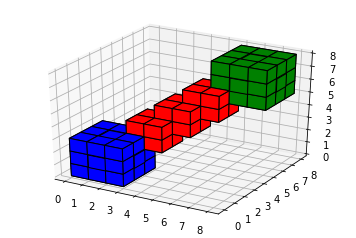

In [8]:
# ukradeno sa: https://matplotlib.org/gallery/mplot3d/voxels.html

# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxels = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')

plt.show()

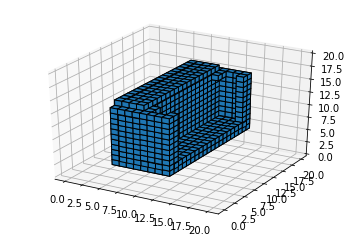

In [9]:
# vizualizacija naseg ucitanog modela

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(nj, edgecolor='k', alpha = 0.1)

plt.show()

In [10]:
help(ax.voxels)

Help on method voxels in module mpl_toolkits.mplot3d.axes3d:

voxels(*args, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    ax.voxels([x, y, z,] /, filled, **kwargs)
    
    Plot a set of filled voxels
    
    All voxels are plotted as 1x1x1 cubes on the axis, with filled[0,0,0]
    placed with its lower corner at the origin. Occluded faces are not
    plotted.
    
    Call signatures::
    
        voxels(filled, facecolors=fc, edgecolors=ec, **kwargs)
        voxels(x, y, z, filled, facecolors=fc, edgecolors=ec, **kwargs)
    
    .. versionadded:: 2.1
    
    Parameters
    ----------
    filled : 3D np.array of bool
        A 3d array of values, with truthy values indicating which voxels
        to fill
    
    x, y, z : 3D np.array, optional
        The coordinates of the corners of the voxels. This should broadcast
        to a shape one larger in every dimension than the shape of `filled`.
        These can be used to plot non-cubic voxels.
    
   

In [11]:
nj.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [12]:
nj.flatten().shape

(8000,)

In [13]:
x = list(range(nj.flatten().shape[0]))

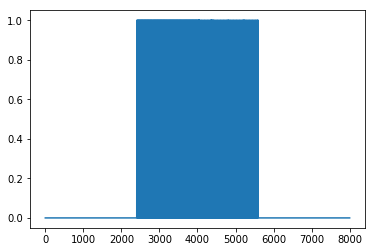

In [14]:
plt.figure()
plt.plot(x, nj.flatten())

In [15]:
# funkcija za prikaz iz source code članka (https://github.com/rohitgirdhar/GenerativePredictableVoxels)
# ista stvar kao i prethodni postupak učitavanja i vizualizacije, samo sto su radili određene rotacije i promjene osi 
# (vjerojatno origigi shapenet ili ikea podaci zahtijevaju ove transformacije, u nekom readme-u piše)

def readModel(mpath):
    model = sio.loadmat(mpath, squeeze_me=True, struct_as_record=False)
    data = model['grid']
    data = np.rot90(data, 2)
    data = np.swapaxes(data, 1, 2)
    data = data[:, ::-1, :]
    return data

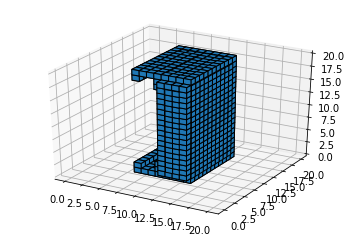

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(readModel("10.mat"), edgecolor='k', alpha = 0.1)

plt.show()

In [17]:
a = np.array([[[1, 1, 2],[1, 1, 2],[1, 1, 2]], [[1, 1, 2], [1, 1, 2], [1, 1, 2]], [[1, 1, 2],[1, 1, 2],[1, 1, 2]]])
a.shape

(3, 3, 3)

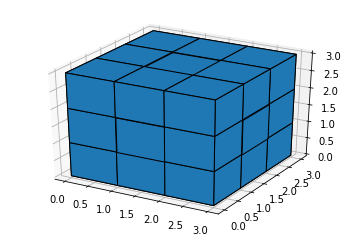

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(a, edgecolor='k', alpha = 0.1)

plt.show()

In [19]:
with open('predikt.pickle', 'rb') as handle:
    b = pickle.load(handle)

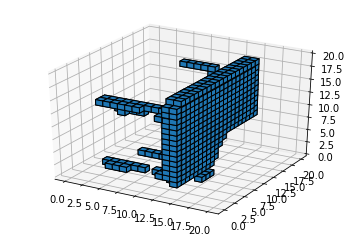

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(np.round(b), edgecolor='k', alpha = 0.1)

plt.show()